import your packages (make sure they're all installed ofc :) )

In [1]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import scipy.stats as stats
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

provide your data (I'm just generating some for X and Y here, you can just say `X=[...] ` and `Y = [...]` )

In [2]:
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ

Wow, a linear thing!

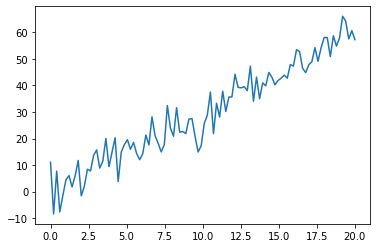

In [3]:
plt.plot(x,y)

Provide a function to optimize (This can be anything, but I'm fitting a linear one here)

In [4]:
def MLELinearModel(params):
    #load in params
    intercept, beta, sd = params[0], params[1], params[2]
    #what does our function look like?
    yhat = intercept + beta*x
    #and *what is the LL?*
    negLL = -np.sum(stats.norm.logpdf(y, loc=yhat,scale=sd))
    #aaaaand return that
    return negLL

And now we just tell python to optimize this function! (i.e. minimize the neg log likelihood, which is equivalent to maximizing likelihood!)

In [5]:
#some starting params
guess = np.array([1,2,3])
results = minimize(MLELinearModel, guess, method = 'Nelder-Mead')
options = {'disp':True}

In [6]:
results

 final_simplex: (array([[-0.22329804,  2.98464843,  4.9352662 ],
       [-0.22329722,  2.98465392,  4.93526394],
       [-0.22339732,  2.98465664,  4.93521674],
       [-0.22335614,  2.98465667,  4.93531464]]), array([301.5343182 , 301.5343182 , 301.53431821, 301.53431821]))
           fun: 301.5343182024615
       message: 'Optimization terminated successfully.'
          nfev: 153
           nit: 85
        status: 0
       success: True
             x: array([-0.22329804,  2.98464843,  4.9352662 ])

How does this look compared to our data?

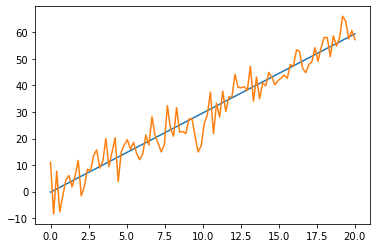

In [11]:
yhat = results.x[0]+results.x[1]*x
plt.plot(x,yhat)
plt.plot(x,y)

We can also do this for other functions ofc:

In [12]:
def MLEQuadraticModel(params):
    intercept, beta, sd = params[0], params[1], params[2]
    yhat = intercept + beta*x**2
    negLL = -np.sum(stats.norm.logpdf(y, loc=yhat,scale=sd))
    return negLL

results2 = minimize(MLEQuadraticModel, guess, method = 'Nelder-Mead')
options = {'disp':True}

print(results2)

 final_simplex: (array([[10.67109516,  0.14142637,  6.05981578],
       [10.67110759,  0.14142669,  6.05983293],
       [10.67104511,  0.1414269 ,  6.0598059 ],
       [10.67101285,  0.14142708,  6.05982461]]), array([322.06194351, 322.06194351, 322.06194351, 322.06194351]))
           fun: 322.0619435115261
       message: 'Optimization terminated successfully.'
          nfev: 359
           nit: 198
        status: 0
       success: True
             x: array([10.67109516,  0.14142637,  6.05981578])


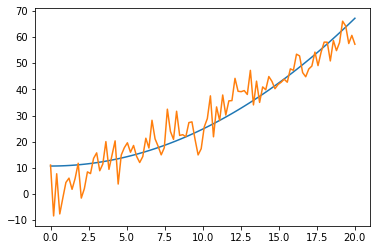

In [13]:
yhat2 = results2.x[0]+results2.x[1]*x**2
plt.plot(x,yhat2)
plt.plot(x,y)

obviously the fit isnt as good here, but this demonstrates how to generalize the approach!